<h1><center>LinearSVC for Linear and Non-Linear Datasets</center></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')

import random
random.seed(10)
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

from sklearn.pipeline import Pipeline

In [2]:
iris_data =  pd.read_csv('../data/Iris.csv')

In [3]:
iris_data.shape

(150, 6)

In [4]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<img src="iris_flowers.PNG" />

In [5]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_data.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [7]:
X = iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris_data['Species']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

### LinearSVC is not a multi-class classifier, hence Scikit-Learn applies One-Vs-Rest and derives prediction for the multi class problem

In [9]:
svm_clf = Pipeline([ ("scaler", StandardScaler()), 
                    ("linear_svc", LinearSVC( C = 600, loss ="hinge", random_state=30)) ]) 
svm_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=600, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=30, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [10]:
svm_clf.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
y_train_pred = svm_clf.predict(X_train)

In [12]:
confusion_matrix(y_train, y_train_pred)

array([[44,  0,  0],
       [ 0, 41,  3],
       [ 0,  1, 46]], dtype=int64)

In [13]:
print("Precision Score : ", precision_score(y_train, y_train_pred, average="macro"))
print("Recall Score : ", recall_score(y_train, y_train_pred, average="macro"))

Precision Score :  0.9716553287981861
Recall Score :  0.9701805286911669


### Test model on Test Set

In [14]:
y_test_pred = svm_clf.predict(X_test)
print("Test - Confusion Matrix \n ", confusion_matrix(y_test, y_test_pred))
print("Test - Precision ", precision_score(y_test, y_test_pred, average="macro"))
print("Test - Recall ", recall_score(y_test, y_test_pred, average="macro"))

Test - Confusion Matrix 
  [[6 0 0]
 [0 6 0]
 [0 0 3]]
Test - Precision  1.0
Test - Recall  1.0


### How to decide threshold (Decision Score) in a multi-class classification.

In [15]:
y_decision_score = svm_clf.decision_function(X_train)

In [16]:
y_decision_score.shape

(135, 3)

In [17]:
y_decision_score[:5, :]

array([[-1.77843223, -0.91323872, -2.40494069],
       [-3.76415948, -1.00616187,  7.35481348],
       [-1.52485973,  0.32131015, -6.00952827],
       [-1.7632841 , -0.06752028, -3.41434065],
       [-3.92139813, -0.93697366,  7.48498321]])

**Note :** An alternative for "LinearSVC" is "SVC" classifier from sklearn.svm, using SVC(kernel="linear", C=600), but it is much slower, especially with large training sets, so it is not recommended.

### Handling NON-Linear dataset using SVM
  * To implement this idea using Scikit-Learn, you can create a Pipeline containing a PolynomialFeatures transformer (discussed in “Polynomial Regression”), followed by a StandardScaler and a LinearSVC.

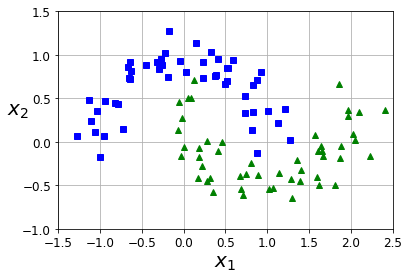

In [18]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [19]:
ls =LinearSVC()
ls.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(random_state=42))
    ])

param_grid = {
        "poly_features__degree": np.arange(1,20),
        "svm_clf__C": np.arange(1, 10)
    }

#### Comparision between RandomizedSearchCV and GridSearchCV

In [21]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [22]:
polynomial_random_svn = RandomizedSearchCV(polynomial_svm_clf, param_grid, cv=10, random_state=20)
polynomial_random_svn.fit(X, y)
print("Best params : ", polynomial_random_svn.best_params_)
print("Best estimator : ", polynomial_random_svn.best_estimator_)

Best params :  {'svm_clf__C': 1, 'poly_features__degree': 16}
Best estimator :  Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=16, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=42,
                           tol=0.0001, verbose=0))],
         verbose=False)


#### Outcome of RandomizedSearchCV is kind of overfitting.

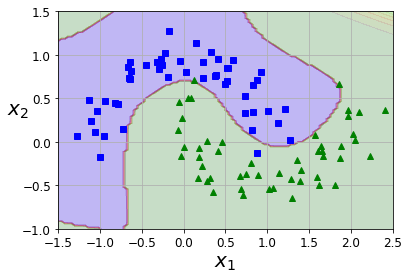

In [23]:
polynomial_svm_clf_1 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=16)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=1, random_state=42))
    ])
polynomial_svm_clf_1.fit(X, y)
plot_predictions(polynomial_svm_clf_1, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [24]:
polynomial_grid_search_svn = GridSearchCV(polynomial_svm_clf, param_grid, cv=10)
polynomial_grid_search_svn.fit(X, y)
print("Best params : ", polynomial_grid_search_svn.best_params_)
print("Best estimator : ", polynomial_grid_search_svn.best_estimator_)

Best params :  {'poly_features__degree': 3, 'svm_clf__C': 2}
Best estimator :  Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=2, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=42,
                           tol=0.0001, verbose=0))],
         verbose=False)


#### Outcome of GridSearchCV looks reasonable but took lot of time to execute.

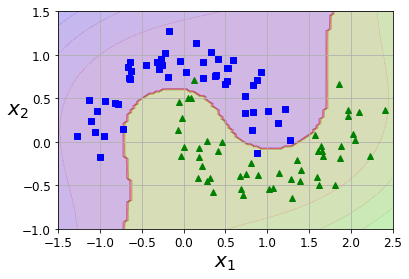

In [25]:
polynomial_svm_clf_2 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=2, random_state=42))
    ])
polynomial_svm_clf_2.fit(X, y)
plot_predictions(polynomial_svm_clf_2, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

<span style="color:red"> **Problems with adding polynomial features :** is simple to implement and can work great with all sorts of Machine Learning algorithms (not just SVMs), but at a low polynomial degree it cannot deal with very complex datasets, and with a high polynomial degree it creates a huge number of features, making the model too slow. </span>

<span style="color:red">Reference: Hands-On Machine Learning with Scikit-Learn, Keras and Tensor Flow by  Aurelien Geron</span>